In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_excel('FPS_hw_2_df_2_COVID-19.xlsx')
df.head()

,date,country,confirmed,deaths
0,2020-01-22,Russia,0,0
1,2020-01-22,US,1,0
2,2020-01-23,Russia,0,0
3,2020-01-23,US,1,0
4,2020-01-24,Russia,0,0


In [ ]:
rus = df[df['country'] == 'Russia']
us = df[df['country'] == 'US']

print('Выборки имеют одинаковую длину', len(rus) == len(us))

Выборки имеют одинаковую длину True


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


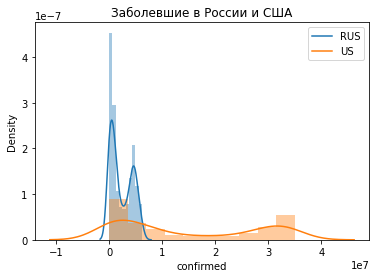

In [ ]:
sns.distplot(rus['confirmed'], 10)
sns.distplot(us['confirmed'], 10)
plt.title('Заболевшие в России и США')
plt.legend(['RUS', 'US'])
plt.show()


Пороверяем гипотезу: Заболеваемость в России отличается от заболеваемости в Соединённых штатах

Формируем H0: Заболеваемость в России НЕ отличается от заболеваемости в Соединённых штатах

In [ ]:
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

alpha = 0.05

Проведение Т-теста (t-критерий Стьюдента)

In [ ]:
result = ttest_ind(rus['confirmed'], us['confirmed'])
print('p-value: %8f' % result.pvalue)

if (result.pvalue < alpha):
   print('Отвергаем нулевую гипотезу')
else: 
   print('Подтверждаем нулевую гипотезу')

p-value: 0.000000
Отвергаем нулевую гипотезу


In [ ]:
# Заболеваемость в России отличается от заболеваемости в Соединенных штатах

Проведение теста Манна-Уитни (U-критерий Манна-Уитни)

In [ ]:
result = mannwhitneyu(rus['confirmed'], us['confirmed'])
print('p-value: %8f' % result.pvalue)

if (result.pvalue < alpha):
   print('Отвергаем нулевую гипотезу')
else: 
   print('Подтверждаем нулевую гипотезу')

p-value: 0.000000
Отвергаем нулевую гипотезу


In [ ]:
# Заболеваемость в России отличается от заболеваемости в Соединенных штатах

In [ ]:
#данную гипотезу так же подтверждает график заболеваемости в обеих странах